# Spectral Analysis 
 
Spectral analysis is a common form of time series analysis. It involves analyzing the variance in a time series, and the contribution of different frequencies. One common example in the ocean is the spectrum of wave energy observed by a buoy. The example below is from a [buoy offshore of Monterey Bay](https://www.ndbc.noaa.gov/station_page.php?station=46042).

![NDBC_wave_spectrum](images/spec_plot.png)

Frequency is expressed in units of $[\text{Hz}]$, or $[\text{cycles/s}]$ on the lower horizontal axis. These frequencies $f$ are the reciprocal of the wave period $T$, or $f = 1/T$. The corresponding periods are shown on the upper horizontal axis. The prominent peak in the plot is showing that the largest waves have a period just over 10 s, or a frequency just below 0.1 Hz. This is sometimes refered to as the *dominant period*, the period that dominates the wave energy.

The units on the vertical axis are representing variance per unit frequency. If the height of the sea surface is measured in units of [$\text{m}$], then the variance of the surface elevation has units $[\text{m}^2]$. When we split the variance into the contributions of different frequencies, then we get units of $[\text{m}^2/\text{Hz}]$.


## Math review - periodic functions

The periodic functions $\sin$ and $\cos$ form the basis of time series analysis. The functions $\cos t$ and $\sin t$ have the same wave-like pattern but they are $\pi/4$ radians out of phase.

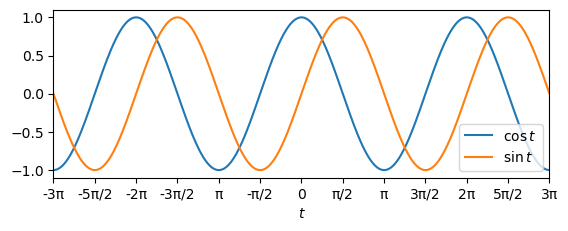

In [1]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(-3*np.pi, 3*np.pi, 1000)

plt.figure()
plt.subplot(211)
plt.plot(t, np.cos(t))
plt.plot(t, np.sin(t))
plt.xlabel('$t$')
plt.legend(['$\cos t$', '$\sin t$'])
plt.xlim([-3*np.pi, 3*np.pi])

theta = np.arange(-3 * np.pi, 3 * np.pi+0.000001, step=(np.pi / 2))
plt.xticks(theta, ['-3π', '-5π/2', '-2π', '-3π/2', 'π', '-π/2', '0', 'π/2', 'π', '3π/2', '2π', '5π/2', '3π']);

If we plot these two functions against each other, so that $x = \cos t$ and $y = \sin t$ we get the unit circle. If we were to calculate the correlation between these two functions we would get a $r = 0$, exactly. So even though the two functions have the same pattern, they are completely uncorrelated because of the phase shift between them.

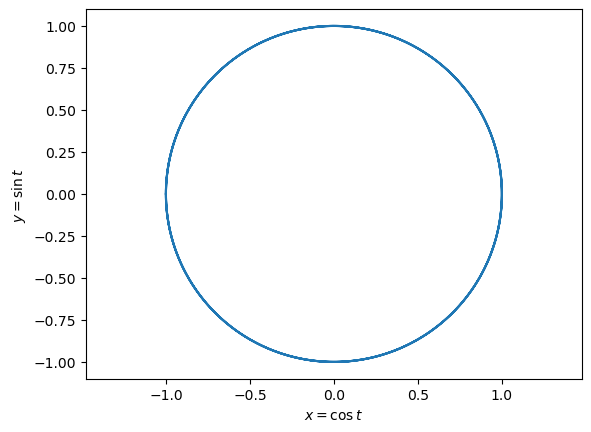

In [2]:
plt.figure()
plt.plot(np.cos(t), np.sin(t))
plt.gca().axis('equal');
plt.xlabel('$x = \cos t$');
plt.ylabel('$y = \sin t$');


## Math review - complex numbers

Complex numbers are a powerful tool for analyzing periodic functions. They can be visualized as a representation of numbers in 2 dimensional space. 

example: $5 + 2i$ , where $i=\sqrt{-1}$

real part: $x = 5$ 

imaginary part: $y = 2$

$z = 5+2i$

Complex numbers can be thought of as vectors in two dimensional space. In the formula above, $x$ and $y$ can be thought of as the components of a vector $z$. We can also think about complex numbers as vectors with a magnitude($r$) and angle/phase ($\phi$). Trigonometry can be used to describe the relationship between these two types of vector representation.

$x=r\cos\phi$

$y=r\sin\phi$

$r=|z|=\sqrt{x^2+y^2}$

$\frac{y}{x}=\tan\phi$

$\phi=\tan^{-1}(\frac{y}{x})$

$=r\cos\phi+i(r\sin\phi)$

$=r(\cos\phi+i\sin\phi)$

$z=re^{i\phi}$ 

This final formula shows how the complex number can be expressed compactly in terms of its magnitude and angle. 

Although we often think of exponential functions as growth or decay, an exponential with an imaginary exponent describes oscillations (i.e. sines and consines). The literature on spectral analysis often uses this type of equation.

### Complex Conjugate

$z=x+iy$

$z^*=x-iy$

$|z|^2=zz^*$

$=(x+iy)(x-iy)$
    
$=x^2-ixy+ixy+y^2$
    
$=x^2+y^2$

## Terminology

### Monochromatic signals

Monochromatic = "one color"

A wave with a single frequency (f=1/t)

Time series of a surface elevation variation $\eta(t)$

$\eta(t)=\eta_{max}cos(2\pi ft)$

$\eta(t)=\eta_{max}cos(2\pi ft-\phi)$

$\eta(t)=\alpha cos(2\pi ft)+\beta sin(2\pi ft)$

$\eta_{max}=\sqrt{\alpha^2+\beta^2}$


In the figure below, a signal with one frequency ($f$ = 1 Hz) is expressed as the combination of a cosine wave where $\alpha = 0.5$ and a sine wave where $\beta = 0.75$.

In [3]:
alpha = 0.5
beta = 0.75

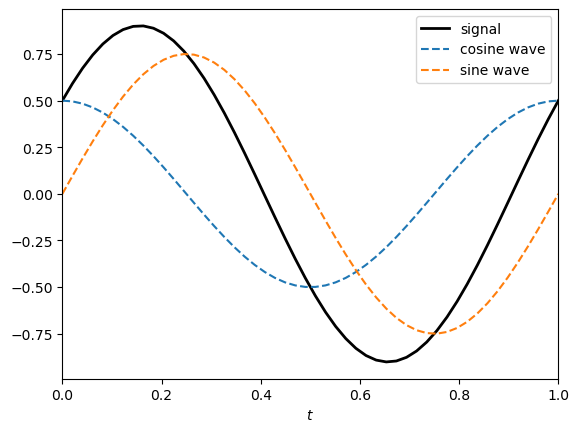

In [4]:

t = np.linspace(0, 1)
plt.figure()
plt.plot(t, alpha*np.cos(2*np.pi*t) + beta*np.sin(2*np.pi*t), 'k-', lw=2)
plt.plot(t, alpha*np.cos(2*np.pi*t), '--')
plt.plot(t, beta*np.sin(2*np.pi*t), '--')
plt.xlim([0, 1])
plt.legend(['signal', 'cosine wave', 'sine wave'])
plt.xlabel('$t$')

np.sqrt(alpha**2 + beta**2);


### Non-monochromatic signals

$\eta(t)=\bar\eta + \eta_{max_1}cos(2\pi ft-\phi_1)+\eta_{max_2}cos(4\pi ft-\phi_2)+ \eta_{max_3}cos(6\pi ft-\phi_3)$

becomes

$\eta(t)=\bar\eta+\sum^3_{j=1}\eta_{max_j} cos(j 2\pi f t-\phi_i)$

or 

$\eta(t)=\bar\eta+\sum^3_{j=1}[\alpha_j cos(j 2\pi f t)+\beta_j sin(j 2\pi f t)]$

An infinite number of sin waves can be added to each other to make any signal in existence. This includes both repeating waveforms and non repeating waveforms.


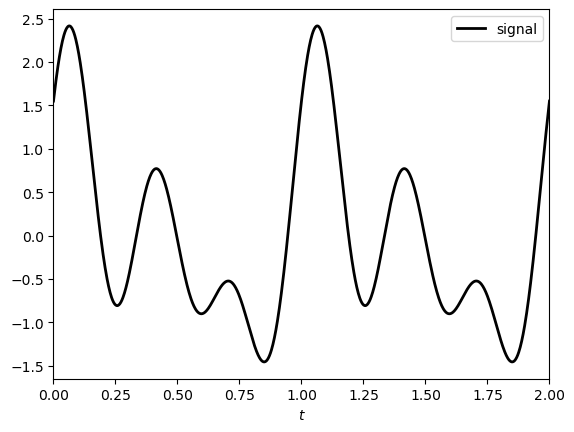

In [5]:
t = np.linspace(0, 2, 1000)

alpha2 = 0.75
beta2 = 0.4
alpha3 = 0.3
beta3 = 0.8

plt.figure()
plt.plot(t, alpha*np.cos(2*np.pi*t) + beta*np.sin(2*np.pi*t)
         + alpha2*np.cos(4*np.pi*t) + beta2*np.sin(4*np.pi*t)
         + alpha3*np.cos(6*np.pi*t) + beta3*np.sin(6*np.pi*t), 'k-', lw=2)
plt.xlabel('$t$')
plt.xlim([0, 2])
plt.legend(['signal', 'cosine wave', 'sine wave']);

### Practical Limitations

- In practice we cannot fit an infinite set of sines and cosines to a time series that we collect in the ocean
- With a limited set of discrete observations, only a limited set of frequencies can be fit to the data
- The lowest frequency (longest period) also called the fundamental frequency 

The fundamental frequency can be written as

$f_f=\frac{1}{t_{max}}$ where $t_{max}$ is the record length (total duration of the time series from start to finish).

or

$f_f=\frac{1}{N\Delta t}$ where $\Delta t$ is the sampling interval (time between data points) and $N$ is the number of samples in the time series.


## Fourier Analysis

Model a time series $y(t)$ with the "harmonics" of the fundamental frequency

$f_f, 2f_f, 3f_f, 4f_f...\frac{N}{2}f_f$

These frequencies range from the lowest frequency we measured (the fundamental frequency) to the highest frequency (the Nyquist frequency). We can also write the Nyquist frequency as

$$ f_N = \frac{N}{2}f_f = \frac{1}{2 \Delta t} $$

At each frequency $f_k = k f_f$ the wave has variance:

$\sigma^2_{y_k}=\frac{1}{2}(\alpha^2_k+\beta^2_k)$

Total variance: $y(t) =\frac{1}{2}y^2_{max_k}$

$\sigma^2_{y_{total}}= \frac{1}{2}\sum^{N/2}_{k=1}(\alpha^2_k+\beta^2_k)$

The waves with greater amplitude contribute more to the variance of the time series. 

Using this set of frequencies, the time series can be rewritten in terms of a sum of sine and cosine functions:

$$ y(t) = \bar{y} + \sum^{N/2}_{k=1} [\alpha_k cos(k 2\pi f_f t) + \beta_k sin(k 2\pi f_f t)]$$

In [6]:
1/(10*60)

0.0016666666666666668

## Discrete Fourier Analysis

The Fourier coefficients of a sequence, or time series, $y = [y_0,y_1,y_2,...,y_{N-1}]$ can be defined as

$$Y_k=\sum^{N-1}_{n=0}y_ne^{-i2\pi kn/N}$$

- For each frequency, the Fourier coeffient is the sum of (all function values $\times$ sines and cosines) over all N.

- The sum of (all function values x sines and cosines) is the same as computing the covariance between the function and sine/cosine waves.

- In general, the Fourier coefficients are complex numbers which describe both the coefficients for both the sine and cosine waves.

Computing these sums for all fequencies gives a set of Fourier coefficients:

$$Y_k =[Y_0,Y_1,Y_2,....Y_{N/2},......Y_{N-1}]$$

- Each coefficient $Y$ can be complex valued. The real part of each $Y_k$ represents the cosine coefficient (analagous to $\alpha_k$ above) and the imaginary part represents the sine coefficient (analagous to $\beta_k$ above). 

- $Y_0$ represents the "zero frequency" or a constant. This is the mean of the time series, which is a constant. 

- The set of coefficients [$Y_1$, ..., $Y_{N/2}$] represents the coefficients for positive frequencies, while the set of coefficients [$Y_1$, ..., $Y_{N/2}$] represents the coefficients for negative frequencies (if we were to reversed the order of the data points). When analyzing time series with real values (no imaginary components), the information corresponding to the positive and negative frequencies is redundant. In this case, we usually only look at the positive frequencies. See [the LOBO spectral analysis example](6-02-lobo-spectral.ipynb) for more information about how the DFT is applied in Python and how to interpret this type of output.

- The intuitive method of computing these coefficients would be to loop through all frequencies and compute the covaraince for each frequency. This requires $N^2$ operations. The "fast Fourrier transform" (FFT) requires only $N\log(N)$ operations. 

The *inverse DFT* gets the time series back to is original form:

$$Y_n=\frac{1}{N}\sum^{N-1}_{n=0}y_ne^{i2\pi kn/N}$$

The Discrete Fourier Transform and Inverse DFT may be shown with different scalings (i.e. there is not always a factor 1/N in the equation above). The form used varies by book and programming language. However, the equations should always be internally consistent, so that the Inverse DFT always returns the original time series.